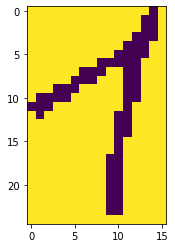

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.]])
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.]])
 array([[1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.]])
 array([[1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
        [1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]])
 array([[1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1

In [3]:
from skimage import io
from skimage.transform import resize
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# read in image as 8 bit grayscale
img = io.imread('baseProjetOCR/1_8.png')
resize(img, (60, 60), preserve_range=True).astype('uint8')

# specify a threshold 0-255
threshold = 150

# make all pixels < threshold black
binarized = 1.0 * (img > threshold)

#convert 3d array to 2d array
binarized = binarized[:,:,0]

imgplot = plt.imshow(binarized)
plt.show()

#print(binarized)

y_zoning = int(len(binarized)/3)
x_zoning = int(len(binarized[0])/3)

vector = []

lis = np.array_split(binarized,9,axis=0)
vectors = np.array(lis,dtype=object)
print(vectors)



[0, 5, 20, 10, 4, 14, 0, 7, 8]


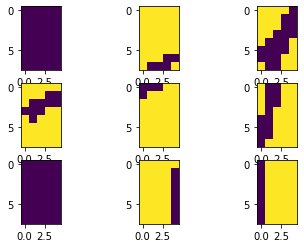

In [32]:
xs = binarized.shape[0]//3  # division lines for the picture
ys = binarized.shape[1]//3

# now slice up the image (in a shape that works well with subplots)
splits = [[binarized[0:xs, 0:ys], binarized[0:xs, ys:ys*2], binarized[0:xs, ys*2:ys*3]], 
[binarized[xs:xs*2, 0:ys], binarized[xs:xs*2, ys:ys*2], binarized[xs:xs*2, ys*2:ys*3]], 
[binarized[xs*2:xs*3, 0:ys], binarized[xs*2:xs*3, ys:ys*2], binarized[xs*2:xs*3, ys*2:ys*3]], 
]

fig, axs = plt.subplots(3, 3)
vects = []
for i in range(3):
    for j in range(3):
        axs[i][j].imshow(splits[i][j])
for i in range(3):
    for j in range(3):
        vects.append(np.count_nonzero(splits[i][j] == 0))

print(vects)
